# LAB 06 - LinePlot


## 04 데이터 분포 시각화 2

### #01.준비작업

#### 1-1.패키지 참조

In [4]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np

#### 1-2 데이터 불러오기

In [5]:
origin = load_data('employee_data_40')
origin.head()

[data] https://data.hossam.kr/data/lab06/employee_data_40.xlsx
[desc] 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터(인덱스, 메타데이터 없음)
[!] Cannot read metadata


,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


#### 1-3 그래프 초기화

In [6]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

### #02.Histplot + KDE
- 히스토그램에 커널 밀도 그래프를 추가한 형태
- histplot() 함수에 kde =True 파라미터를 추가한다

C:\Users\itwill\AppData\Local\Temp\ipykernel_23316\2797079546.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


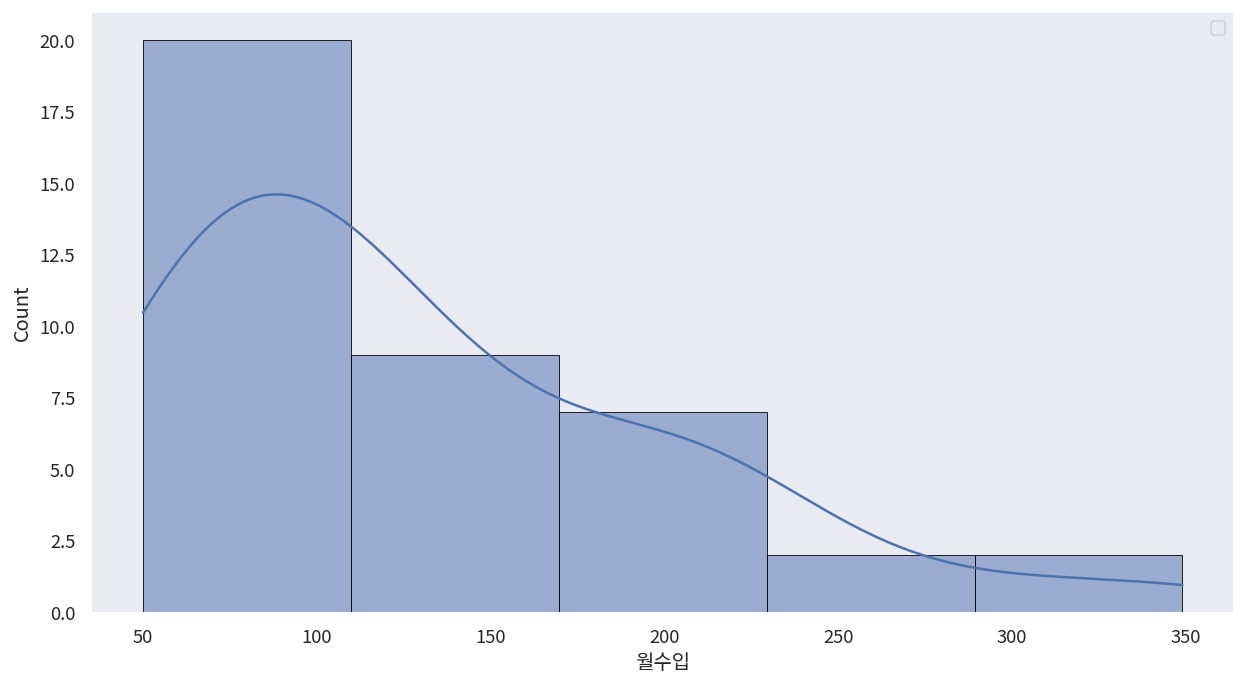

In [7]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Histogram 그리기
sb.histplot(
    data=origin, x="월수입",
    bins=5,
    edgecolor="#000000", linewidth=0.5 , kde=True
)

# 3) 그래프 꾸미기
ax.legend(loc='upper right')

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


### #03.그 밖의 데이터 분포 시각화 방법
#### 3-1 바이올린 플롯
- 데이터의 분포 형태를 한눈에 보여줌
- 박스 플롯에 커널 밀도 추정 그래프를 결합한 형태
- 중앙엥는 중앙값,IQR 등을 표시에 박스 플롯 정보도 함께 제공
- 여러 그룹 카테고리 분포 비교에 효과적
- 데이터의 세부적 분포 구조를 박스 플롯보다 더 잘 표현함

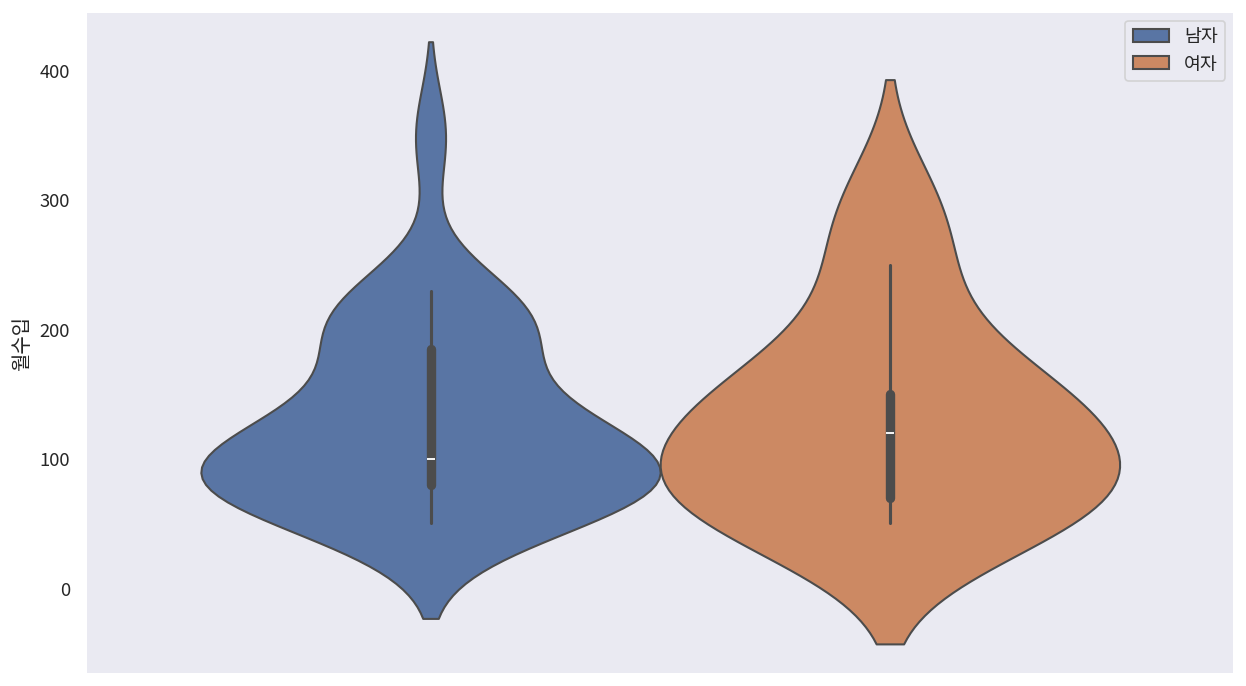

In [8]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Histogram 그리기
sb.violinplot(

    data=origin, y="월수입",hue = '성별'
)

# 3) 그래프 꾸미기
ax.legend(loc='upper right')

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


#### 3-2 Strip 플롯
- 개별 데이터를 점 하나씩 그대로 표시하는 분포 시각화
- x축이나 y 축을 기준으로 값들이 가로 혹은 세로로 흩뿌려진 형태
- 작은 표본이나 정확한 관측값 하나하나를 보여줄 떄 효과적
- 범주형 그룹 간 원시 데이터 비교가 가능
- 여러 그룹 비교 시 swarmplot 과 함꼐 많이 사용됨

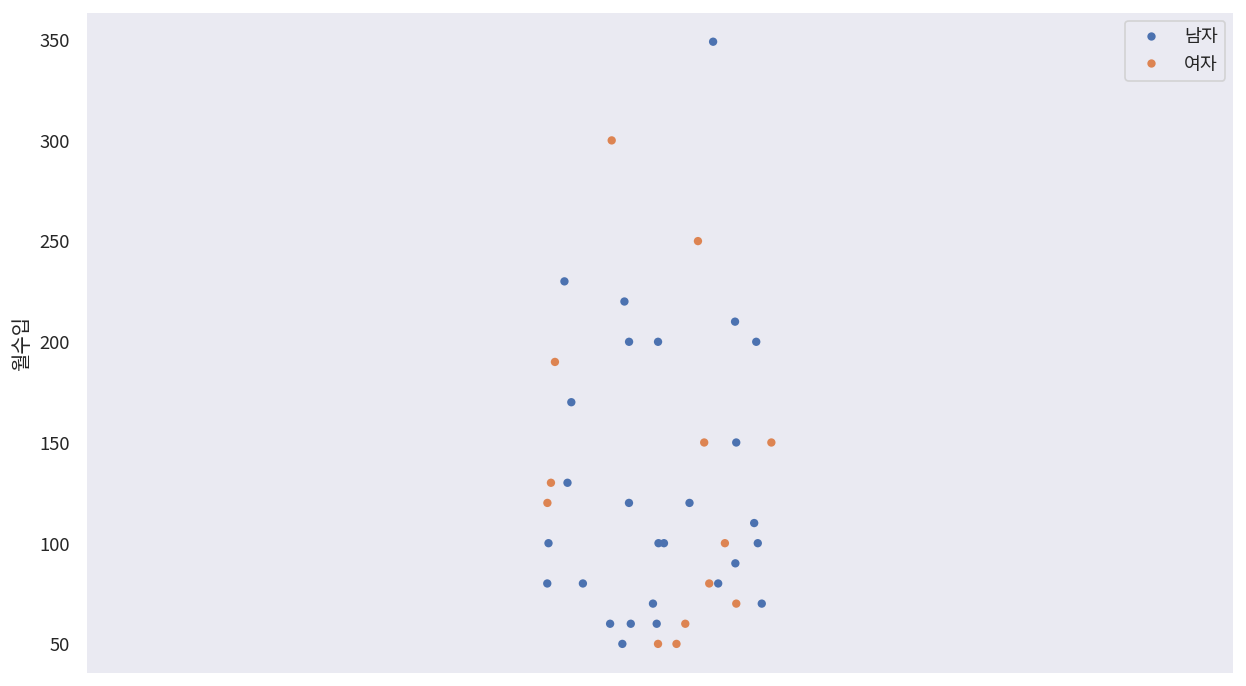

In [9]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Histogram 그리기
sb.stripplot(

    data=origin, y="월수입",hue = '성별'
)

# 3) 그래프 꾸미기
ax.legend(loc='upper right')

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


#### 3-2 Swarm 플롯
- strip plot 처럼 개별 데이터 점을 그대로 표시하는 분포 시각화
- 점들이 겹치지 않도록 자동으로 배치된다
- 표본수가 많아도 가독성이 좋다
- 범주형 그룹별 데이터의 실제 분포 형태를 비교할 떄 유용하다

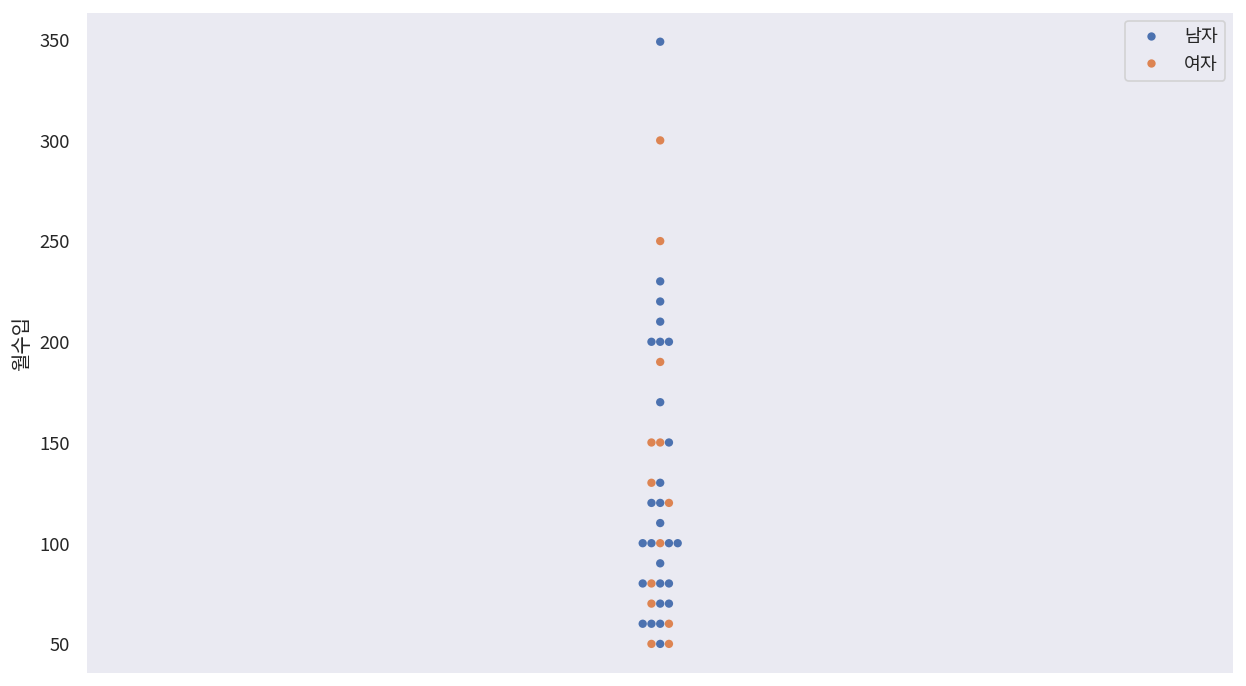

In [ ]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Histogram 그리기
sb.swarmplot(

 data=origin, y="월수입",hue = '성별'
)

# 3) 그래프 꾸미기
ax.legend(loc='upper right')

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료
